<a href="https://colab.research.google.com/github/bakharia/FoodOverConsumption/blob/master/Food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Sources
*   https://ourworldindata.org/food-supply [csv file, calorie consumption from 1970 - 2013] 
*   https://www.cia.gov/library/publications/the-world-factbook/fields/341.html [population]
*   https://health.gov/our-work/food-nutrition/2015-2020-dietary-guidelines/guidelines/appendix-2/ [recommeded cal]
*   https://ourworldindata.org/obesity [obesity rates for different countries from 1975]






#Libraries



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Importing Data

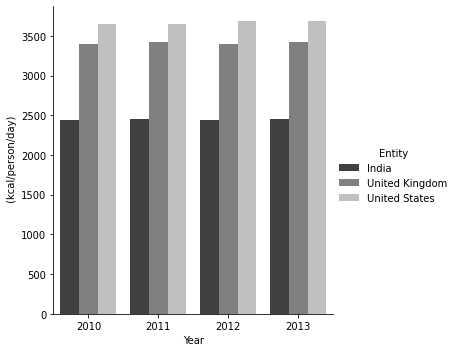

In [ ]:
df = pd.read_csv('/content/daily-per-capita-caloric-supply.csv')
df = df[df['Year'] > 1974]
country_list = ['United States', 'India', 'United Kingdom']
df = df[df['Entity'].isin(country_list)]
df = df.reset_index(drop= True)
sns.catplot(x="Year", y=" (kcal/person/day)", hue="Entity", kind="bar", palette="gray",data=df[df['Year'] > 2009])

#Manipulating the data

Taking weighted mean of recommended calorie consumption as per 'https://health.gov/our-work/food-nutrition/2015-2020-dietary-guidelines/guidelines/appendix-2/ ' based on ratio of the population in the age group 25-54 years 

In [ ]:
average_calorie = {
    'India' : 2279,
    'United States' : 2267,
    'United Kingdom' : 2280
}
for c in country_list:
  df.loc[df['Entity'] == c,' (kcal/person/day)'] = (df.loc[df['Entity'] == c,' (kcal/person/day)'] - (average_calorie[c]))/(df.loc[df['Entity'] == c,' (kcal/person/day)']*0.01)
df = df.rename(columns= {" (kcal/person/day)": "kcal/person/day% above recommended"})
df.head()

,Entity,Code,Year,kcal/person/day% above recommended
0,India,IND,1975,-10.631068
1,India,IND,1976,-18.512741
2,India,IND,1977,-8.214625
3,India,IND,1978,-6.098696
4,India,IND,1979,-12.543210


# Representation

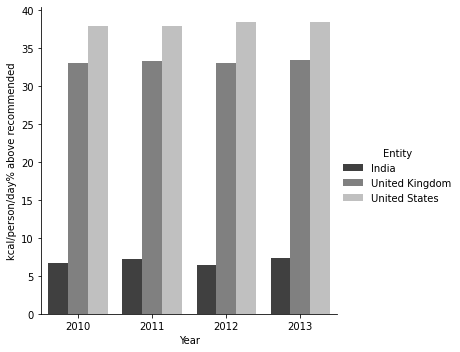

In [ ]:
sns.catplot(x="Year", y="kcal/person/day% above recommended", hue="Entity", kind="bar", palette="gray",data=df[df['Year'] > 2009])

# Obseity Rates for different country

In [ ]:
ob_df = pd.read_csv('/content/share-of-adults-who-are-overweight.csv')
cal_df = pd.read_csv('/content/daily-per-capita-caloric-supply.csv')

Filtering Data

In [ ]:
ob_df = ob_df[(ob_df['Entity'].isin(country_list))] #Filtering countries
ob_df = ob_df[(ob_df['Year'] > 1974) & (ob_df['Year'] < 2014)] #Filtering by year
ob_df = ob_df.reset_index(drop= True)
ob_df = ob_df.set_index('Year', drop = True)
ob_df = ob_df.sort_index()

cal_df = cal_df[(cal_df['Entity'].isin(country_list))] #Filtering countries
cal_df = cal_df[(cal_df['Year'] > 1974) & (cal_df['Year'] < 2014)] #Filtering by year
cal_df = cal_df.reset_index(drop = True)
cal_df = cal_df.set_index('Year', drop = True)
cal_df = cal_df.sort_index()

Deriving Result

In [ ]:
result = pd.merge(ob_df,cal_df,how= "outer", on = ['Year', 'Entity', 'Code'])

oc_df = df.set_index('Year', drop = True)
oc_df = oc_df.sort_index()

result = pd.merge(result,oc_df,how= "outer", on = ['Year', 'Entity', 'Code'])
result = result[result.index > 1999]
result = result.reset_index()
result['Year'] %= 2000
result = result.rename(columns={'Year' : 'Year in 20xx'})
result

,Year in 20xx,Entity,Code,Share of adults that are overweight (%),(kcal/person/day),kcal/person/day% above recommended
0,0,United States,USA,60.1,3755.0,39.627164
1,0,United Kingdom,GBR,57.5,3362.0,32.183224
2,0,India,IND,11.4,2380.0,4.243697
3,1,United States,USA,60.9,3707.0,38.845428
4,1,United Kingdom,GBR,58.2,3400.0,32.941176
5,1,India,IND,11.8,2333.0,2.314616
6,2,United States,USA,61.7,3783.0,40.074015
7,2,United Kingdom,GBR,58.8,3416.0,33.255269
8,2,India,IND,12.2,2285.0,0.262582
9,3,United States,USA,62.4,3777.0,39.978819


#### Find if people are obese at 18 every year in the graph below

<Figure size 1440x720 with 0 Axes>

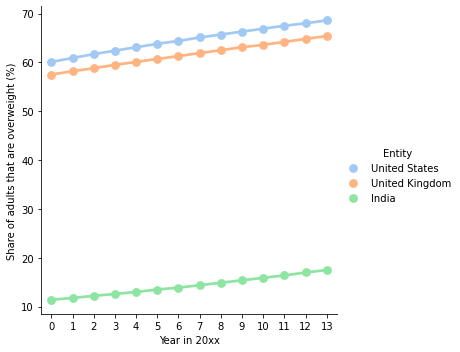

In [ ]:
plt.figure(figsize=(20,10))
sns.catplot(x="Year in 20xx", y="Share of adults that are overweight (%)", kind = "point",hue="Entity", palette = "pastel", data=result)

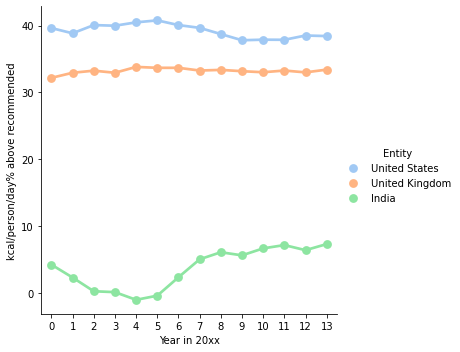

In [ ]:
sns.catplot(x="Year in 20xx",  y = "kcal/person/day% above recommended", kind = "point",hue="Entity", palette="pastel", data=result);

##### From the above graph we can infer that, in the case of India, the % of overweight people keep on increasing even thouhg the colorie intake is not v high in some years. This indicates that more junk food is being consumed even though the colorie intake is low.


# Number of Quick Service Restaurants(QSR) in the us

#### source => https://www.statista.com/statistics/217561/number-of-quick-service-restaurant-franchise-establishments-in-the-us/

In [ ]:
us_res = {
    'Year' : [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020],
    'Number of QSR franchise establishments' : [150291, 151887, 150316, 149547, 147902, 151156, 178133, 180717, 183332, 187368, 190649, 194395, 196794, 199549]
}
us_res = pd.DataFrame(data = us_res)
us_res

,Year,Number of QSR franchise establishments
0,2007,150291
1,2008,151887
2,2009,150316
3,2010,149547
4,2011,147902
5,2012,151156
6,2013,178133
7,2014,180717
8,2015,183332
9,2016,187368


###### The number of restaurants can be linked with demad for them because of which there was a sudden increase in 2013 from 2012


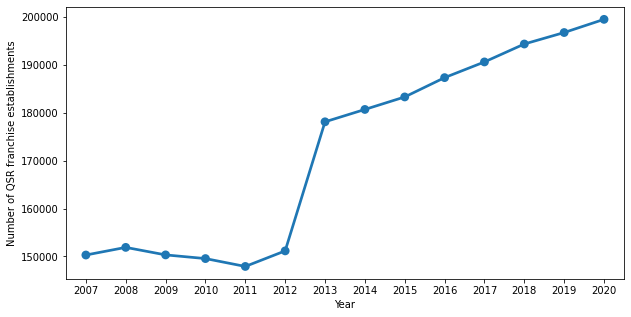

In [ ]:
plt.figure(figsize=(10,5))
sns.pointplot(x = "Year", y = "Number of QSR franchise establishments", data = us_res)

# Percentage of adults aged 20 and over who consumed fast food on a given day, by sex and age: United States, 2013–2016

##### source =>https://www.cdc.gov/nchs/products/databriefs/db322.htm#:~:text=In%202013%E2%80%932016%2C%2036.6%25,adults%20aged%2060%20and%20over.



<Figure size 1440x576 with 0 Axes>

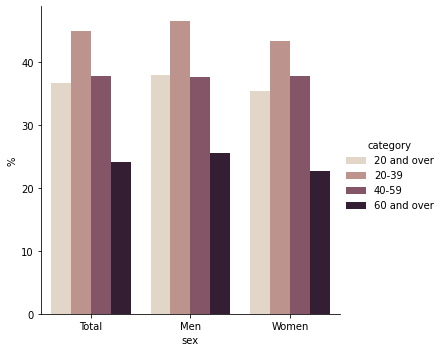

In [ ]:
ff = pd.read_csv('/content/Percentage of adults aged 20 and over who consumed fast food on a given day, by sex and age.csv')
plt.figure(figsize=(20,8))
sns.catplot(x = "sex", y = "%", hue = "category", kind = "bar", palette="ch:.25",data = ff)